# Clustering and Dimensionality Reduction Exam
Welcome to the weekly project on clustering and dimensionality reduction. You will be working with a dataset of traffic accidents.

## Dataset
The dataset that will be used in this task is `Traffic_Accidents.csv`

## Instructions
- Follow the steps outlined below.
- Write your code in the empty code cells.
- Comment on your code to explain your reasoning.

## Dataset Overview
The dataset contains information about traffic accidents, including location, weather conditions, road conditions, and more. Below are sample of these columns:

* `Location_Easting_OSGR`: Easting coordinate of the accident location.
* `Location_Northing_OSGR`: Northing coordinate of the accident location.
* `Longitude`: Longitude of the accident site.
* `Latitude`: Latitude of the accident site.
* `Police_Force`: Identifier for the police force involved.
* `Accident_Severity`: Severity of the accident.
* `Number_of_Vehicles`: Number of vehicles involved in the accident.
* `Number_of_Casualties`: Number of casualties in the accident.
* `Date`: Date of the accident.
* `Day_of_Week`: Day of the week when the accident occurred.
* `Speed_limit`: Speed limit in the area where the accident occurred.
* `Weather_Conditions`: Weather conditions at the time of the accident.
* `Road_Surface_Conditions`: Condition of the road surface during the accident.
* `Urban_or_Rural_Area`: Whether the accident occurred in an urban or rural area.
* `Year`: Year when the accident was recorded.
* Additional attributes related to road type, pedestrian crossing, light conditions, etc.

## Goal
The primary goal is to analyze the accidents based on their geographical location.


## Import Libraries

In [152]:
# Libraries for dealing with the data:
import pandas as pd
import numpy as np
# Libraries to visualize data:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
# Modelus for preproccing:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import silhouette_score
from sklearn.feature_selection import SelectKBest, chi2, f_regression # Those imports are for filling missing data if found.
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
# Modules for the ML model:
from sklearn.cluster import KMeans,DBSCAN,HDBSCAN
from sklearn.decomposition import PCA

## Load the Data

In [153]:
df = pd.read_csv('/content/Traffic_Accident.csv')

## Exploratory Data Analysis (EDA)
Perform EDA to understand the data better. This involves several steps to summarize the main characteristics, uncover patterns, and establish relationships:
* Find the dataset information and observe the datatypes.
* Check the shape of the data to understand its structure.
* View the the data with various functions to get an initial sense of the data.
* Perform summary statistics on the dataset to grasp central tendencies and variability.
* Check for duplicated data.
* Check for null values.

And apply more if needed!


In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52000 entries, 0 to 51999
Data columns (total 30 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Unnamed: 0                                   52000 non-null  int64  
 1   Accident_Index                               52000 non-null  object 
 2   Location_Easting_OSGR                        52000 non-null  float64
 3   Location_Northing_OSGR                       52000 non-null  float64
 4   Longitude                                    52000 non-null  float64
 5   Latitude                                     52000 non-null  float64
 6   Police_Force                                 52000 non-null  int64  
 7   Accident_Severity                            52000 non-null  int64  
 8   Number_of_Vehicles                           51198 non-null  float64
 9   Number_of_Casualties                         52000 non-null  int64  
 10

In [155]:
df.shape

(52000, 30)

In [156]:
df.head()

,Unnamed: 0,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,...,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,88245,2.01E+12,381880.0,298700.0,-2.268891,52.585773,21,3,2.0,2,...,0.0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,2.0,Yes,E01029654,2005.0
1,78422,200520D303703,413520.0,284740.0,-1.802453,52.460412,20,2,1.0,1,...,0.0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,E01009313,2005.0
2,19574,200501TX20137,516260.0,177370.0,-0.327073,51.483290,1,3,2.0,2,...,454.0,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,E01002678,2005.0
3,79337,200520E097001,401530.0,282610.0,-1.978930,52.441426,20,3,2.0,1,...,0.0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,1.0,No,E01008924,2005.0
4,89121,2.01E+12,421760.0,320680.0,-1.678823,52.783240,21,3,1.0,1,...,0.0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,2.0,Yes,E01029416,2005.0


In [157]:
df.sample(5)

,Unnamed: 0,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,...,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
24652,17627,200501TA00267,529570.0,182470.0,-0.133619,51.526233,1,3,2.0,1,...,0.0,None within 50 metres,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,1.0,Yes,E01000852,2005.0
186,15586,200501RG40629,542140.0,175480.0,0.044649,51.460400,1,3,2.0,1,...,0.0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,E01001625,2005.0
50454,35591,200505BS00399,333750.0,394570.0,-2.998913,53.443709,5,3,2.0,1,...,565.0,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight: Street light present,Fine without high winds,Wet/Damp,1.0,Yes,E01007010,2005.0
38021,90386,2005215M34137,388990.0,330690.0,-2.165032,52.873546,21,3,2.0,1,...,0.0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,2.0,Yes,E01029695,2005.0
23514,33258,200504F018805,386210.0,439810.0,-2.211129,53.854333,4,3,1.0,1,...,0.0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,1.0,No,E01025176,2005.0


In [158]:
df.tail()

,Unnamed: 0,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,...,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
51995,58660,200511DJ27240,427910.0,515740.0,-1.570167,54.536179,11,3,2.0,1,...,55.0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,E01012363,2005.0
51996,101443,20053102C2156,450720.0,340010.0,-1.246470,52.955054,31,3,1.0,1,...,6002.0,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,E01028141,2005.0
51997,437,200501BS70452,526580.0,177540.0,-0.178465,51.482604,1,3,1.0,1,...,0.0,None within 50 metres,Zebra crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,1.0,Yes,E01002840,2005.0
51998,61353,2.01E+12,426800.0,463700.0,-1.591972,54.068547,12,3,2.0,2,...,0.0,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Fine without high winds,Dry,2.0,Yes,E01027681,2005.0
51999,75359,2005160D02810,509970.0,428420.0,-0.334114,53.740566,16,3,2.0,1,...,0.0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,E01012853,2005.0


In [159]:
df.describe()

,Unnamed: 0,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Speed_limit,2nd_Road_Class,2nd_Road_Number,Urban_or_Rural_Area,Year
count,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,51198.000000,52000.000000,51463.000000,51999.000000,51999.000000,51999.000000,50959.000000,51999.000000,51999.000000,51999.000000,51999.0
mean,52309.605596,439654.064615,338794.330769,-1.425829,52.940991,11.101904,2.848481,1.843060,1.358615,4.120009,155.142060,4.084155,1025.653859,36.768971,2.933383,340.922479,1.249736,2005.0
std,30282.566278,66711.811588,115731.113185,0.975537,1.044812,9.558172,0.390890,0.708149,0.804162,1.934134,114.153616,1.415258,1882.560604,12.707643,3.138719,1205.580339,0.432953,0.0
min,0.000000,296780.000000,156110.000000,-3.596752,51.289060,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,20.000000,-1.000000,-1.000000,1.000000,2005.0
25%,25924.750000,388110.000000,194160.000000,-2.179555,51.630849,1.000000,3.000000,1.000000,1.000000,2.000000,32.000000,3.000000,0.000000,30.000000,-1.000000,0.000000,1.000000,2005.0
50%,52285.500000,429505.000000,361950.000000,-1.552874,53.149640,10.000000,3.000000,2.000000,1.000000,4.000000,142.000000,3.000000,74.000000,30.000000,4.000000,0.000000,1.000000,2005.0
75%,78552.250000,516010.000000,415952.500000,-0.312861,53.638514,20.000000,3.000000,2.000000,1.000000,6.000000,254.000000,6.000000,642.000000,40.000000,6.000000,0.000000,1.000000,2005.0
max,104949.000000,559570.000000,656390.000000,0.350177,55.800830,48.000000,3.000000,18.000000,23.000000,7.000000,570.000000,6.000000,9999.000000,70.000000,6.000000,9711.000000,3.000000,2005.0


In [160]:
# It seems like a lot of features have been assigned the wrong data types:
# Let's check the null values for each
for col in df.columns:
  print(f'The unique value for feature {col}:')
  print(df[col].unique())
  print('-'*100)

The unique value for feature Unnamed: 0:
[88245 78422 19574 ...   437 61353 75359]
----------------------------------------------------------------------------------------------------
The unique value for feature Accident_Index:
['2.01E+12' '200520D303703' '200501TX20137' ... '20053102C2156'
 '200501BS70452' '2005160D02810']
----------------------------------------------------------------------------------------------------
The unique value for feature Location_Easting_OSGR:
[381880. 413520. 516260. ... 460040. 511930. 509970.]
----------------------------------------------------------------------------------------------------
The unique value for feature Location_Northing_OSGR:
[298700. 284740. 177370. ... 452300. 245160. 515740.]
----------------------------------------------------------------------------------------------------
The unique value for feature Longitude:
[-2.268891 -1.802453 -0.327073 ... -0.178465 -1.591972 -0.334114]
---------------------------------------------------

In [161]:
df.dtypes

,0
Unnamed: 0,int64
Accident_Index,object
Location_Easting_OSGR,float64
Location_Northing_OSGR,float64
Longitude,float64
Latitude,float64
Police_Force,int64
Accident_Severity,int64
Number_of_Vehicles,float64
Number_of_Casualties,int64


## Data Preprocessing
Do what you think you need such as:
* Remove the outliers
* Impute missing data
* Scale the data
* Reduce dimentions using PCA
* Implement One-Hot Encoding for nominal categorical variables.

In [162]:
df['Urban_or_Rural_Area'].unique()

array([ 2.,  1.,  3., nan])

In [163]:
# The Unnamed: 0	and Accident_Index are merly indexing values, so for that they will be dropped:
df.drop('Unnamed: 0', axis = 1, inplace = True)
df.drop('Accident_Index', axis = 1, inplace = True)

In [164]:
df.isnull().sum()

,0
Location_Easting_OSGR,0
Location_Northing_OSGR,0
Longitude,0
Latitude,0
Police_Force,0
Accident_Severity,0
Number_of_Vehicles,802
Number_of_Casualties,0
Date,0
Day_of_Week,537


In [165]:
def fill_with_mode(series):
    mode_value = series.mode()
    if not mode_value.empty:
        return series.fillna(mode_value[0])
    return series

In [166]:
df['Day_of_Week'].unique()

array([ 1.,  7.,  5.,  3.,  2.,  6.,  4., nan])

In [167]:
# Fill the missing values values and then change the data types to the appropriate ones:
df['Day_of_Week'] = df.groupby(['Date'])['Day_of_Week'].transform(lambda x: x.fillna(x.mean())) # First we'll fill the day of the week according to the date.
# There is one more missing value so we'll fill it using fillna
df['Day_of_Week'].fillna(df['Day_of_Week'].mode()[0], inplace = True)

In [168]:
# Fill the missing values values and then change the data types to the appropriate ones:
df['Number_of_Vehicles'] = df.groupby(['Day_of_Week'])['Number_of_Vehicles'].transform(lambda x: x.fillna(x.mean()))
# There is a liitle more missing value so we'll fill it using fillna
df['Number_of_Vehicles'].fillna(df['Number_of_Vehicles'].mode()[0], inplace = True)

In [169]:
# Fill the missing values values and then change the data types to the appropriate ones:
df['Speed_limit'] = df.groupby(['Day_of_Week', 'Number_of_Vehicles'])['Speed_limit'].transform(lambda x: x.fillna(x.mean()))
# There is a liitle more missing value so we'll fill it using fillna
df['Speed_limit'] = df.groupby(['Number_of_Vehicles'])['Speed_limit'].transform(lambda x: x.fillna(x.mean()))
# Fill the rest in the case that there is more:
df['Speed_limit'].fillna(df['Speed_limit'].mode()[0], inplace = True)

In [170]:
df.isnull().sum()

,0
Location_Easting_OSGR,0
Location_Northing_OSGR,0
Longitude,0
Latitude,0
Police_Force,0
Accident_Severity,0
Number_of_Vehicles,0
Number_of_Casualties,0
Date,0
Day_of_Week,0


In [171]:
df.shape

(52000, 28)

In [172]:
# Due to the nature of the data set we'll drop the rest of the null values:
df.dropna(inplace = True)

In [173]:
df.shape

(51944, 28)

In [174]:
# Before dealing with the missing values let's first correct any uncorrectly assigned data type: Local_Authority_(District)
df['Number_of_Vehicles'] = df['Number_of_Vehicles'].astype(int)
df['Day_of_Week'] = df['Day_of_Week'].astype(int)
df['Local_Authority_(District)'] = df['Local_Authority_(District)'].astype(int)
df['1st_Road_Class'] = df['1st_Road_Class'].astype(int)
df['Speed_limit'] = df['Speed_limit'].astype(int)
df['2nd_Road_Class'] = df['2nd_Road_Class'].astype(int)
df['Urban_or_Rural_Area'] = df['Urban_or_Rural_Area'].astype(int)
df['Year'] = df['Year'].astype(int)
# After checking each unique value, it was clear that the int data type is more appropriate

## Feature Selection
Select relevant features for clustering. Explain your choice of features.


In [175]:
df.columns

Index(['Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude',
       'Latitude', 'Police_Force', 'Accident_Severity', 'Number_of_Vehicles',
       'Number_of_Casualties', 'Date', 'Day_of_Week', 'Time',
       'Local_Authority_(District)', 'Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       '2nd_Road_Class', '2nd_Road_Number',
       'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions', 'Urban_or_Rural_Area',
       'Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location', 'Year'],
      dtype='object')

In [176]:
# I will make the feature selection to create clusters based on what what can impact Accedent severity according to the viauals down bellow:
X = df[['Accident_Severity', 'Number_of_Vehicles', 'Number_of_Casualties', 'Day_of_Week', '1st_Road_Class', '2nd_Road_Class', 'Road_Type', 'Speed_limit', 'Light_Conditions', 'Weather_Conditions', 'Road_Surface_Conditions']]


In [177]:
X.shape

(51944, 11)

## Data Visualization
Visualize the data using appropriate plots to gain insights into the dataset. Using the following:
- Scatter plot of accidents based on Longitude and Latitude.

In [178]:
df.dtypes

,0
Location_Easting_OSGR,float64
Location_Northing_OSGR,float64
Longitude,float64
Latitude,float64
Police_Force,int64
Accident_Severity,int64
Number_of_Vehicles,int64
Number_of_Casualties,int64
Date,object
Day_of_Week,int64


In [179]:
df.columns

Index(['Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude',
       'Latitude', 'Police_Force', 'Accident_Severity', 'Number_of_Vehicles',
       'Number_of_Casualties', 'Date', 'Day_of_Week', 'Time',
       'Local_Authority_(District)', 'Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       '2nd_Road_Class', '2nd_Road_Number',
       'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions', 'Urban_or_Rural_Area',
       'Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location', 'Year'],
      dtype='object')

In [180]:
# First let's deal with outliers:
# Due to the nature of this data set we'll clear out the outliers straight away: (we'll make a couple of box plots)
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

def remove_outliers_all_columns(df):
    numeric_cols = df.select_dtypes(include=['number']).columns
    for col in numeric_cols:
        df = remove_outliers(df, col)
    return df


In [181]:
fig = px.box(df, y = 'Number_of_Vehicles', color = 'Day_of_Week')
fig.show()

In [182]:
fig = px.box(df, y = 'Speed_limit', color = 'Accident_Severity')
fig.show()

In [183]:
fig = px.histogram(df, x = 'Number_of_Casualties')
fig.show()

In [184]:
fig = px.bar(df, x = 'Road_Type', y = 'Number_of_Casualties', color = 'Accident_Severity')
fig.show()

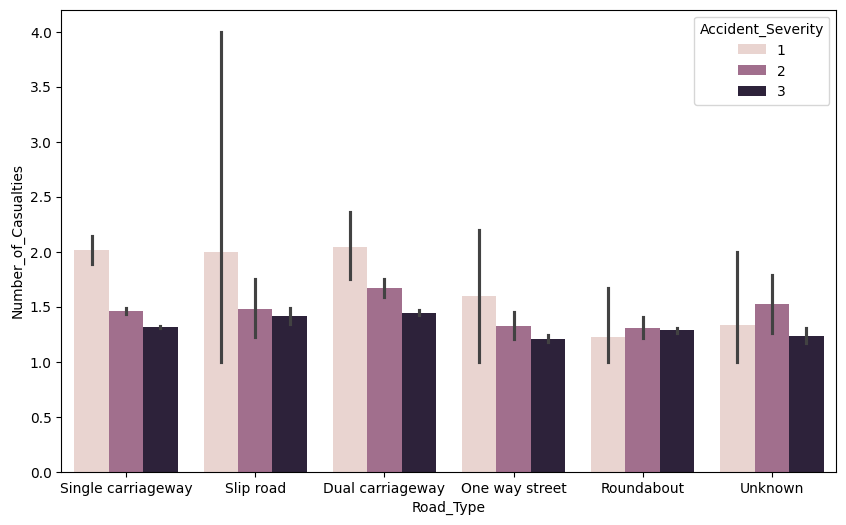

In [185]:
plt.figure(figsize = (10,6))
sns.barplot(df, x = 'Road_Type', y = 'Number_of_Casualties', hue = 'Accident_Severity')
plt.show()

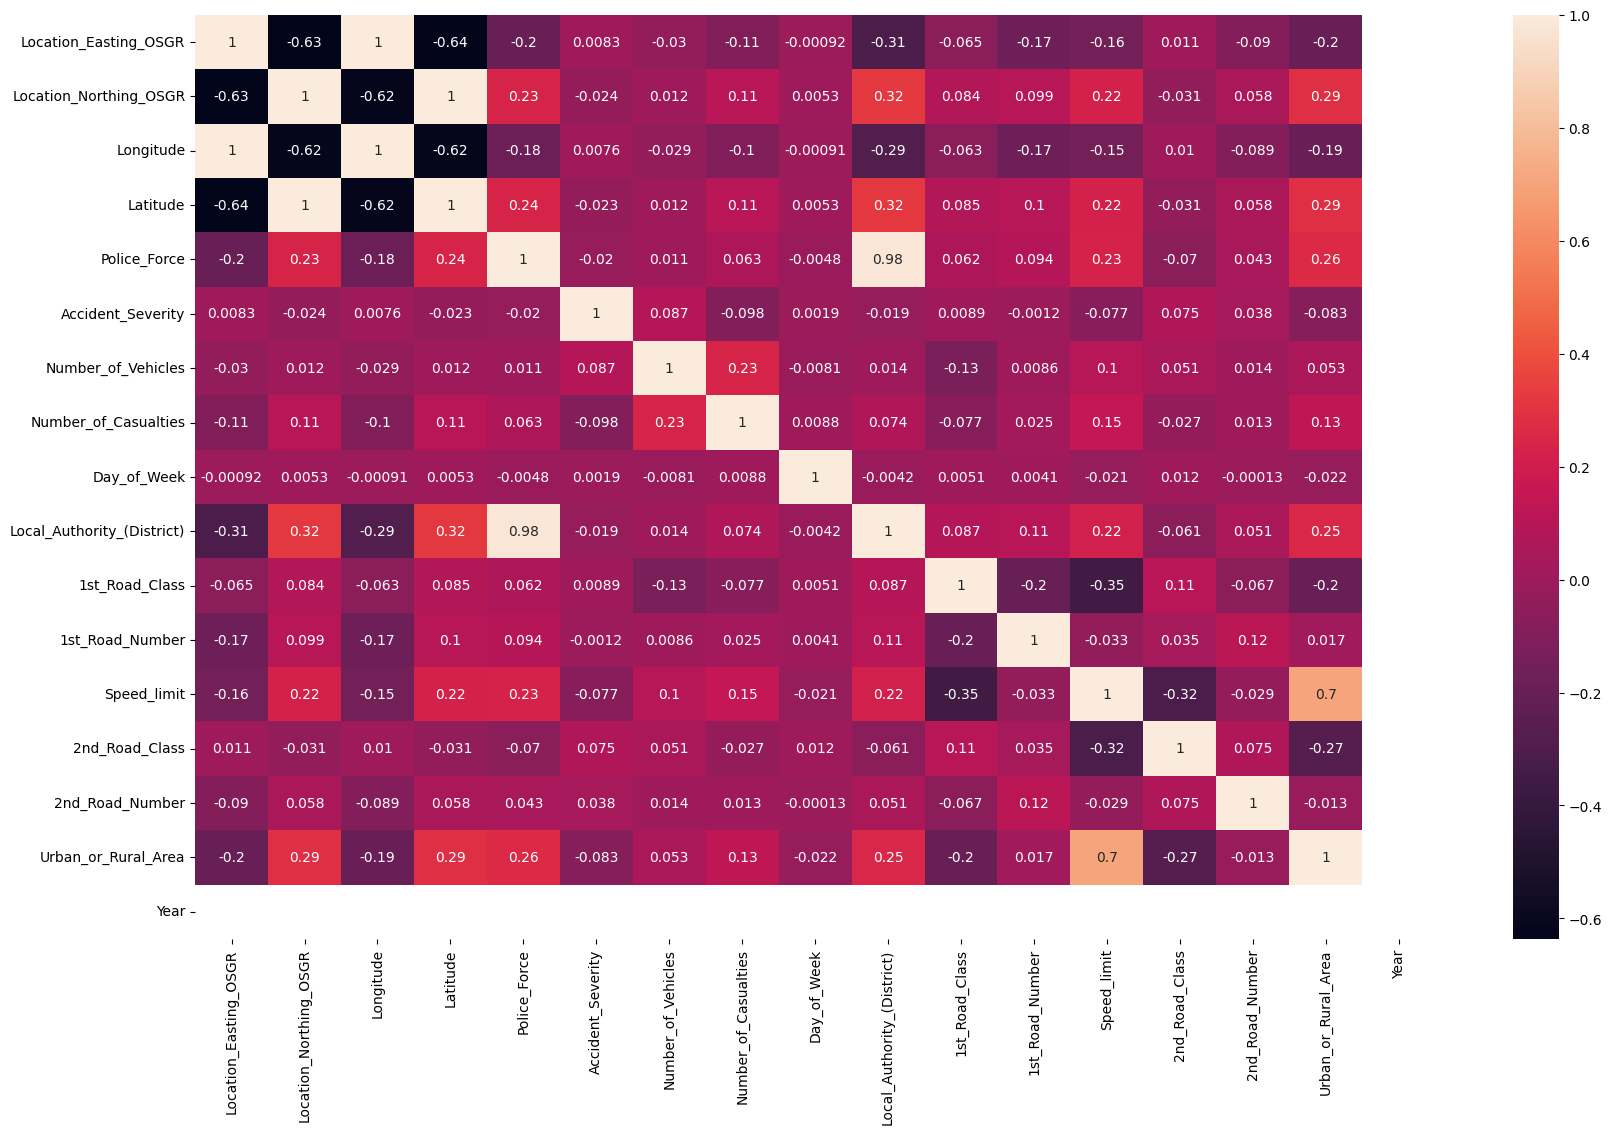

In [186]:
numeric_col = df.select_dtypes(include = ['number'])
numeric_matrix = numeric_col.corr()
plt.figure(figsize = (20,12))
sns.heatmap(numeric_matrix, annot = True)
plt.show()

## Clustering
Apply K-Means clustering. Determine the optimal number of clusters and justify your choice.
* Find the `n_clusters` parameter using the elbow method.
* Train the model.

In [187]:
X.head()

,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,1st_Road_Class,2nd_Road_Class,Road_Type,Speed_limit,Light_Conditions,Weather_Conditions,Road_Surface_Conditions
0,3,2,2,1,5,-1,Single carriageway,60,Daylight: Street light present,Fine without high winds,Dry
1,2,1,1,7,3,-1,Slip road,20,Daylight: Street light present,Fine without high winds,Dry
2,3,2,2,7,3,4,Dual carriageway,30,Daylight: Street light present,Fine without high winds,Dry
3,3,2,1,5,4,-1,Dual carriageway,40,Darkness: Street lights present and lit,Fine without high winds,Dry
4,3,1,1,3,3,-1,Dual carriageway,70,Darkness: Street lights present and lit,Fine without high winds,Dry


In [188]:
X.shape

(51944, 11)

In [189]:
X.dtypes

,0
Accident_Severity,int64
Number_of_Vehicles,int64
Number_of_Casualties,int64
Day_of_Week,int64
1st_Road_Class,int64
2nd_Road_Class,int64
Road_Type,object
Speed_limit,int64
Light_Conditions,object
Weather_Conditions,object


In [190]:
df['Road_Type']

,Road_Type
0,Single carriageway
1,Slip road
2,Dual carriageway
3,Dual carriageway
4,Dual carriageway
...,...
51995,Single carriageway
51996,Single carriageway
51997,Single carriageway
51998,Single carriageway


In [191]:
le = LabelEncoder()

In [192]:
X['Light_Conditions'] = le.fit_transform(X['Light_Conditions'])
X['Road_Type'] = le.fit_transform(X['Road_Type'])
X['Weather_Conditions'] = le.fit_transform(X['Weather_Conditions'])
X['Light_Conditions'] = le.fit_transform(X['Light_Conditions'])
X['Road_Surface_Conditions'] = le.fit_transform(X['Road_Surface_Conditions'])

<ipython-input-192-bffed83c240d>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-192-bffed83c240d>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-192-bffed83c240d>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-192-bff

In [193]:
# Our preproccesing will done through the pipeline:
col_tran_steps = [
    ('Scaling', MinMaxScaler(), ['Accident_Severity','Number_of_Vehicles','Number_of_Casualties', 'Day_of_Week', '1st_Road_Class', '2nd_Road_Class', 'Speed_limit'])
] # For some odd reason encoding categorical features through an error.
col_transformer = ColumnTransformer(col_tran_steps)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will 

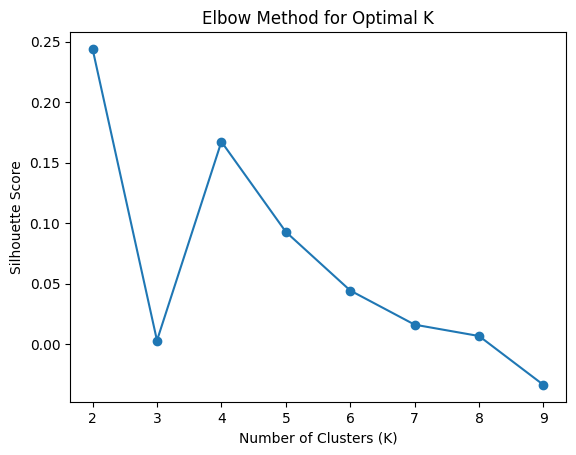

In [194]:
# We can use the elbow method to find the appropriate number of clusters for this data set.
# We'll put the silhouette score on the y axis and the number of crystals (K) on the X-axis:
sil_scores = []
for k in range(2,10):
  K_S = [
    ("Column Transformation", col_transformer),
    ("PCA", PCA(n_components = 0.9)), # We'll use 90% of the components
    ("KMeans", KMeans(n_clusters = k,init='k-means++')) # K-means++ centers the centroids after calculating where to put them.
  ]
  KMeans_pipeline = Pipeline(K_S)
  KMeans_pipeline.fit(X)
  sil_scores.append(silhouette_score(X, KMeans_pipeline.predict(X)))

# Create the elbow plot:
plt.plot(range(2,10), sil_scores, marker = 'o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Elbow Method for Optimal K')
plt.show()

In [199]:
# After plotting the elbow, we notice that 3 clusters will most likely fit the data the best.
K_S_main = [
    ("Column Transformation", col_transformer),
    ("PCA", PCA(n_components = 0.9)), # We'll use 90% of the components
    ("KMeans", KMeans(n_clusters = 3,init='k-means++')) # K-means++ centers the centroids after calculating where to put them.
  ]
KMeans_pipeline = Pipeline(K_S_main)
KMeans_pipeline.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Pipeline(steps=[('Column Transformation',
                 ColumnTransformer(transformers=[('Scaling', MinMaxScaler(),
                                                  ['Accident_Severity',
                                                   'Number_of_Vehicles',
                                                   'Number_of_Casualties',
                                                   'Day_of_Week',
                                                   '1st_Road_Class',
                                                   '2nd_Road_Class',
                                                   'Speed_limit'])])),
                ('PCA', PCA(n_components=0.9)),
                ('KMeans', KMeans(n_clusters=3))])

## Evaluation
Evaluate the clustering result using appropriate metrics.


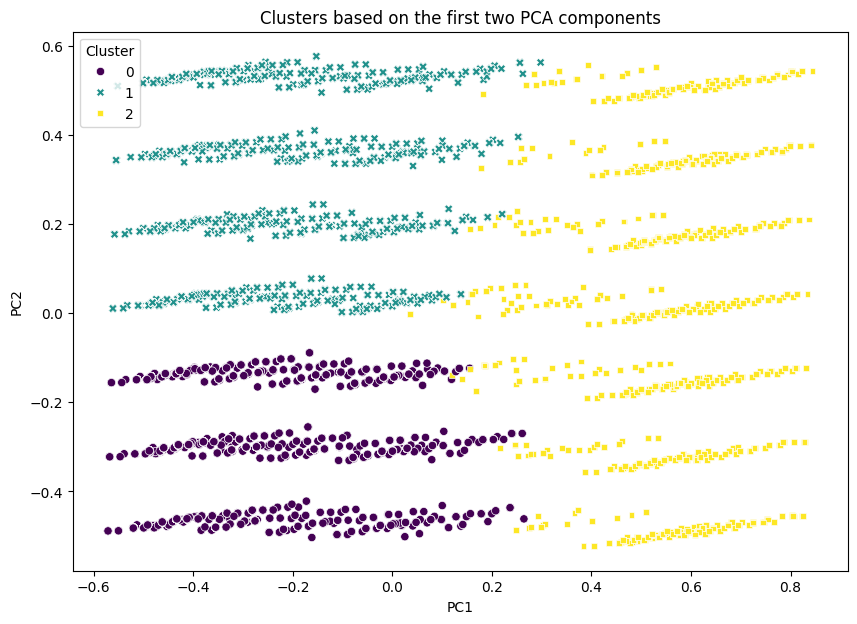

In [201]:
cluster_labels = KMeans_pipeline.named_steps['KMeans'].labels_
pca_transformed = KMeans_pipeline.named_steps['PCA'].transform(KMeans_pipeline.named_steps['Column Transformation'].transform(df))

# Convert PCA-transformed data to DataFrame for easier plotting
pca_df = pd.DataFrame(pca_transformed, columns=[f'PC{i+1}' for i in range(pca_transformed.shape[1])])

# Add the cluster labels to the DataFrame
pca_df['Cluster'] = cluster_labels

# Plot the first two principal components with cluster centers
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', style = 'Cluster', data=pca_df, palette='viridis')
plt.title('Clusters based on the first two PCA components')
plt.show()


In [202]:
df.columns

Index(['Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude',
       'Latitude', 'Police_Force', 'Accident_Severity', 'Number_of_Vehicles',
       'Number_of_Casualties', 'Date', 'Day_of_Week', 'Time',
       'Local_Authority_(District)', 'Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       '2nd_Road_Class', '2nd_Road_Number',
       'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions', 'Urban_or_Rural_Area',
       'Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location', 'Year'],
      dtype='object')

In [203]:
# Due to the fact that our clustering above didn't really give us much.
# We'll pick the Longitude and the Latitude as our features with the goal of locating where accedents occur:
Y = df[['Longitude', 'Latitude']]
col_tranfor2_steps = [
    ('Scaling', StandardScaler(), ['Longitude', 'Latitude']) # Since it's only these two
]
col_transformer2 = ColumnTransformer(col_tranfor2_steps)

In [205]:
Y

,Longitude,Latitude
0,-2.268891,52.585773
1,-1.802453,52.460412
2,-0.327073,51.483290
3,-1.978930,52.441426
4,-1.678823,52.783240
...,...,...
51995,-1.570167,54.536179
51996,-1.246470,52.955054
51997,-0.178465,51.482604
51998,-1.591972,54.068547


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will 

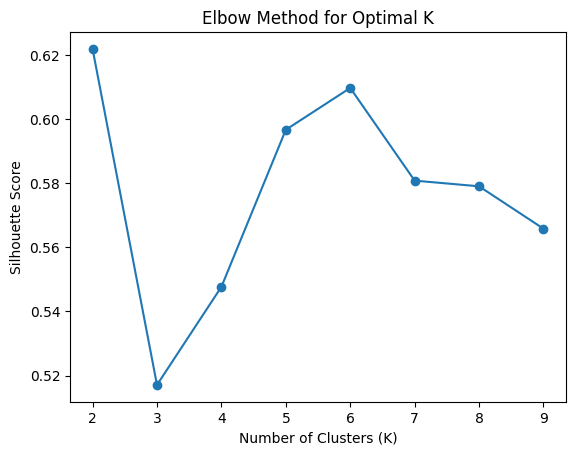

In [209]:
# We can use the elbow method to find the appropriate number of clusters for this data set.
# We'll put the silhouette score on the y axis and the number of crystals (K) on the X-axis:
sil2_scores = []
for k in range(2,10):
  K_S2 = [
    ("Column Transformation", col_transformer2),
    #("PCA", PCA(n_components = 0.9)), PCA IS NOT NEEDED.
    ("KMeans", KMeans(n_clusters = k,init='k-means++')) # K-means++ centers the centroids after calculating where to put them.
  ]
  KMeans_pipeline2 = Pipeline(K_S2)
  KMeans_pipeline2.fit(Y)
  sil2_scores.append(silhouette_score(Y, KMeans_pipeline2.predict(Y)))

# Create the elbow plot:
plt.plot(range(2,10), sil2_scores, marker = 'o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Elbow Method for Optimal K')
plt.show()

In [211]:
# After plotting the elbow, we notice that 3 clusters will most likely fit the data the best.
K_S_main2 = [
    ("Column Transformation", col_transformer2),
    #("PCA", PCA(n_components = 0.9)), PCA IS NOT NEEDED.
    ("KMeans", KMeans(n_clusters = 3,init='k-means++')) # K-means++ centers the centroids after calculating where to put them.
  ]
KMeans_pipeline2 = Pipeline(K_S_main2)
KMeans_pipeline2.fit(Y)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Pipeline(steps=[('Column Transformation',
                 ColumnTransformer(transformers=[('Scaling', StandardScaler(),
                                                  ['Longitude', 'Latitude'])])),
                ('KMeans', KMeans(n_clusters=3))])

<ipython-input-215-9ab37bb53cf8>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



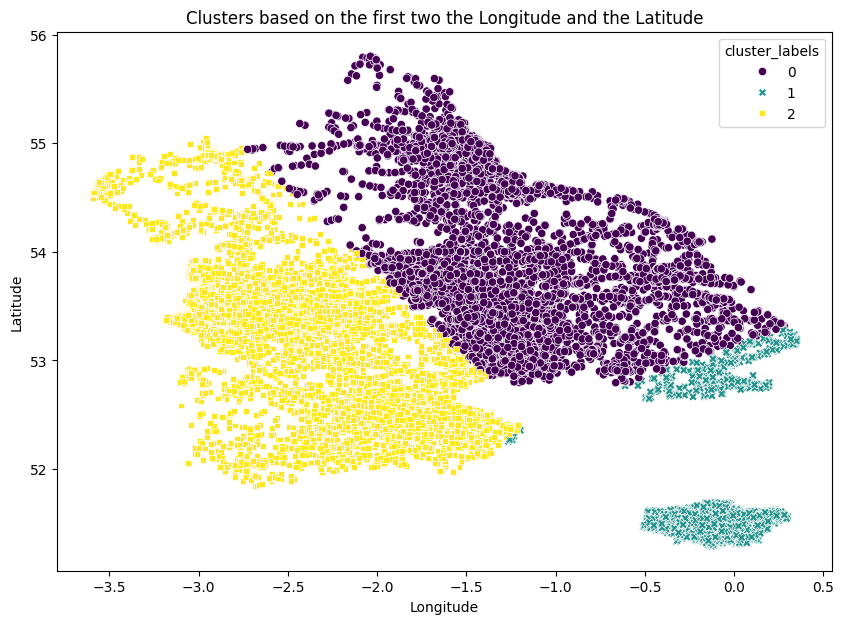

In [215]:
cluster_labels = KMeans_pipeline2.named_steps['KMeans'].labels_
# Convert PCA-transformed data to DataFrame for easier plotting
# Add the cluster labels to the DataFrame
# Plot the first two principal components with cluster centers
plt.figure(figsize=(10, 7))
Y['cluster_labels'] = cluster_labels
sns.scatterplot(x='Longitude', y='Latitude', hue='cluster_labels', style = 'cluster_labels', data=Y, palette='viridis')
plt.title('Clusters based on the first two the Longitude and the Latitude')
plt.show()


## Plot the data points with their predicted cluster center

## Exam Questions
* **Justify Your Feature Selection:**
   - Which features did you choose for clustering and why?
* **Number of Clusters Choices:**
   - How did you determine the optimal number?
* **Evaluation:**
   - Which metrics did you use to evaluate the clustering results, and why?
   - How do these metrics help in understanding the effectiveness of your clustering approach?
* **Improvements and Recommendations:**
   - Suggest any improvements or future work that could be done with this dataset. What other methods or algorithms would you consider applying?



1.   Feature selection was based accedent severity, I hand picked features that had correlation with the accedent severity after visualizing the data, now when it comes to the second clustering made I picked the Longitude and the Latitude as our features with the goal of locating where accedents occur.

2.   Using the elbow method it gave us a clear out look at the correlation between the number of clusters and the silhouette metric for both clusterings made.


3.   The silhouette metric fits best with kmeans clustring due to the fact that it calculates both the distance between points and clusters and the distance between clusters themselves.

4.   The second cluster gives us a good starting point of identefying what and where are the hotspots for accedents, which in turn could help us make a better judgment at selecting the location where maintanance and suppervision is needed.



